# Determining a prospective tariff for a telecom company

## Project Description

"Megaline" is a federal cellular operator. Clients are offered two tariff plans: "Smart" and "Ultra". In order to adjust the advertising budget, the commercial department wants to understand which plan brings in more money.

## Purpose of research

* It is necessary to make a preliminary analysis of tariffs on a small sample of customers. The data of 500 "Megaline" users are available: who they are, where they come from, what tariff they use, how many calls and messages each sent in 2018.
* It is necessary to analyze the behavior of customers and draw a conclusion - which tariff is better.

## Steps of the research

1) Data review;

2) Data preprocessing (filling in gaps, eliminating dibbles and anomalies);

3) Data analysis;

4) Hypothesis testing;

5) Conclusion.

# 1. Data review

Import all the necessary libraries to work with the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import stats as st

## 1.1 Table "calls"

Let's have a look at the table with information about users.

In [2]:
try:
    data_calls = pd.read_csv('D:\Yandex_Data_Analysis\Project_4\calls.csv')
except:
    data_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


By the condition of the problem in the column 'duration' zeros indicate missed calls, so we will not delete them.

In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

There are no missing values in this dataset. The data is recorded correctly.

## 1.2. Table "internet"

Let's take a look at the table with information about Internet sessions.

In [6]:
try:
    data_internet = pd.read_csv('D:\Yandex_Data_Analysis\Project_4\internet.csv')
except:
    data_internet = pd.read_csv('/datasets/internet.csv')

In [7]:
data_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [8]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
data_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

There are no missing values in this dataset. The data is recorded correctly.

## 1.3. Table "messages"

Let's get familiar with the table with information about the messages.

In [10]:
try:
    data_messages = pd.read_csv('D:\Yandex_Data_Analysis\Project_4\messages.csv')
except:
    data_messages = pd.read_csv('/datasets/messages.csv')

In [11]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

There are no missing values in this dataset. The data is recorded correctly.

## 1.4. Table "tariffs"

Let's look at the table with information about tariffs.

In [14]:
try:
    data_tariffs = pd.read_csv(r'D:\Yandex_Data_Analysis\Project_4\tariffs.csv')
except:
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [15]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


The table gives a visual representation of 'Smart' and 'Ultra' tariffs.

## 1.5. Table 'users'

Let's look at the table with information about users.

In [16]:
try:
    data_users = pd.read_csv(r'D:\Yandex_Data_Analysis\Project_4\users.csv')
except:
    data_users = pd.read_csv('/datasets/users.csv')

In [17]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [18]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
display(data_users.isna().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

The 'churn_date' column contains information about the date when the tariff was terminated. According to the condition of the problem, the missing values in this column means that the tariff was still valid at the time of data unloading, so we will not delete or replace them. There are no problems with the other columns.

# 2. Data preprocessing

After a quick look at the data in 5 tables, it turned out that there is one extra column in the dataset internet, which simply duplicates the indexes - 'Unnamed: 0'. It can be removed.

In [20]:
data_internet = data_internet.drop('Unnamed: 0', axis=1)
data_internet.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


The terms of the problem say that the operator "Megaline" always rounds seconds to minutes, and megabytes to gigabytes:
* A call lasting 1 second is rounded up to 1 minute. 
* For web traffic, the total amount per month is rounded upwards. If a subscriber uses 1025 megabytes in a month, he/she will be charged for 2 gigabytes.
* Unused calls, SMS and Internet traffic of the previous month will not be carried over to the next month.

*Taking these conditions into account, round up the values in columns 'duration' and 'mb_used' in tables data_calls and data_internet respectively.

In [21]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)
data_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


## 2.1. Number of calls made and minutes used by month

Let's create a new column with the month in the dataset with information about the calls.

In [22]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
month_calls = data_calls['call_date'].dt.month
data_calls.insert(2, 'month', month_calls)
data_calls.tail(5)

,id,call_date,month,duration,user_id
202602,1499_215,2018-12-26,12,1,1499
202603,1499_216,2018-10-18,10,19,1499
202604,1499_217,2018-11-10,11,11,1499
202605,1499_218,2018-10-06,10,5,1499
202606,1499_219,2018-12-14,12,20,1499


*Create a cumulative table with the number of used minutes by month for each user.*

In [23]:
calls_duration_grouped = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
calls_duration_grouped.columns = ['sum_minutes']
calls_duration_grouped.head(5)

sum_minutes
user_id month             
1000    5              159
        6              172
        7              340
        8              408
        9              466

## 2.2. Number of messages sent by month

Let's create a new column with the month in the dataset with information about messages.

In [24]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
month_message = data_messages['message_date'].dt.month
data_messages.insert(2, 'month', month_message)
data_messages.head(5)

,id,message_date,month,user_id
0,1000_0,2018-06-27,6,1000
1,1000_1,2018-10-08,10,1000
2,1000_2,2018-08-04,8,1000
3,1000_3,2018-06-16,6,1000
4,1000_4,2018-12-05,12,1000


Create a crosstab with the number of messages sent per month for each user. Replace the empty values with 0 and convert all values to integers.

In [25]:
message_grouped = data_messages.pivot_table(index=['user_id','month'],  values='id', aggfunc='count')
message_grouped.columns = ['cnt_messages']
message_grouped.head(5)

cnt_messages
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57

## 2.3. Amount of Internet traffic consumed by month

Let's create a new column with the month in the dataset with information about web traffic.

In [26]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
month_internet = data_internet['session_date'].dt.month
data_internet.insert(3, 'month', month_internet)
data_internet.head(5)

,id,mb_used,session_date,month,user_id
0,1000_0,112.95,2018-11-25,11,1000
1,1000_1,1052.81,2018-09-07,9,1000
2,1000_2,1197.26,2018-06-25,6,1000
3,1000_3,550.27,2018-08-22,8,1000
4,1000_4,302.56,2018-09-24,9,1000


Create a summary table where we group the total amount of traffic used per month for each user. Replace empty values with 0 and convert all values to integers, rounding them up beforehand.

In [27]:
internet_grouped = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_grouped.columns = ['sum_internet']
internet_grouped.head(5)

sum_internet
user_id month              
1000    5           2253.49
        6          23233.77
        7          14003.64
        8          14055.93
        9          14568.91

## 2.4. Monthly revenue per user

In [28]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Let's combine all 3 tables with minutes, messages, and Internet traffic into one summary table.

In [29]:
calls_sms = calls_duration_grouped.merge(message_grouped, on=['user_id','month'], how='left')
used_data = calls_sms.merge(internet_grouped, on=['user_id','month'], how='left')
used_data.head()

sum_minutes  cnt_messages  sum_internet
user_id month                                         
1000    5              159          22.0       2253.49
        6              172          60.0      23233.77
        7              340          75.0      14003.64
        8              408          81.0      14055.93
        9              466          57.0      14568.91

Let's check if there are empty values in the summary table.

In [30]:
used_data.isna().sum()

sum_minutes       0
cnt_messages    496
sum_internet     11
dtype: int64

Apparently empty values occur where users did not use the network resources. Therefore, replace these blanks with 0. Also round up the values and make all the numbers integers.

In [31]:
used_data = used_data.fillna(0)
used_data = np.ceil(used_data).astype(int)
display(used_data.head(5))

sum_minutes  cnt_messages  sum_internet
user_id month                                         
1000    5              159            22          2254
        6              172            60         23234
        7              340            75         14004
        8              408            81         14056
        9              466            57         14569

Let's see how many lines with zero internet value.

In [32]:
used_data.query('sum_internet == 0')['sum_internet'].count()

13

According to the terms of tariffs, web traffic is rounded upwards, so replace 0 with 1024 (Mb).

In [33]:
used_data.loc[used_data['sum_internet']==0,'sum_internet'] = 1024
used_data.query('sum_internet == 0')['sum_internet'].count()

0

Let's combine the table of resources spent with the table of users.

In [34]:
used_data = used_data.reset_index()
merged_users = used_data.merge(data_users, on='user_id', how='left')
merged_users.head(10)

,user_id,month,sum_minutes,cnt_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,22,2254,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,60,23234,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,75,14004,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,81,14056,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,57,14569,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,350,73,14703,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,338,58,14757,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,333,70,9818,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,430,0,18430,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,414,0,14037,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


*Calculate the number of minutes spent in excess of the set tariff. To do this, let's create a function.

In [35]:
def minutes_excess(row):

    tariff = row['tariff']
    minutes = row['sum_minutes']

    if tariff == 'ultra':
        if minutes > 3000:
            return minutes - 3000
        else:
            return 0
    else:
        if minutes > 500:
            return minutes - 500
        else:
            return 0

merged_users['minutes_excess'] = merged_users.apply(minutes_excess, axis=1)  
merged_users.tail(5)

,user_id,month,sum_minutes,cnt_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,minutes_excess
3169,1498,10,247,42,20580,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0
3170,1499,9,70,11,1846,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0
3171,1499,10,449,48,17789,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0
3172,1499,11,612,59,17964,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,112
3173,1499,12,492,66,13056,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0


*Now let's calculate the number of messages sent in excess of the set tariff. To do this let's create a function.

In [36]:
def sms_excess(row):

    tariff = row['tariff']
    sms = row['cnt_messages']

    if tariff == 'ultra':
        if sms > 1000:
            return sms - 1000
        else:
            return 0
    else:
        if sms > 50:
            return sms - 50
        else:
            return 0

merged_users['sms_excess'] = merged_users.apply(sms_excess, axis=1)  
merged_users.tail(5)

,user_id,month,sum_minutes,cnt_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,minutes_excess,sms_excess
3169,1498,10,247,42,20580,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,0
3170,1499,9,70,11,1846,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0
3171,1499,10,449,48,17789,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0
3172,1499,11,612,59,17964,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,112,9
3173,1499,12,492,66,13056,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,16


### *Now let's calculate the amount of Internet traffic used in excess of the set tariff. To do this let's create a function.*

In [37]:
def internet_excess(row):

    tariff = row['tariff']
    internet = row['sum_internet']

    if tariff == 'ultra':
        if internet > 30720:
            return internet - 30720
        else:
            return 0
    else:
        if internet > 15360:
            return internet - 15360
        else:
            return 0

merged_users['internet_excess'] = merged_users.apply(internet_excess, axis=1)  
merged_users.tail(5)

,user_id,month,sum_minutes,cnt_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,minutes_excess,sms_excess,internet_excess
3169,1498,10,247,42,20580,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,0,5220
3170,1499,9,70,11,1846,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0,0
3171,1499,10,449,48,17789,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0,2429
3172,1499,11,612,59,17964,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,112,9,2604
3173,1499,12,492,66,13056,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,16,0


Let's round up internet traffic to GB to whole numbers.

In [38]:
merged_users['sum_internet'] = np.ceil(merged_users['sum_internet']/1024).astype(int)
merged_users['internet_excess'] = np.ceil(merged_users['internet_excess']/1024).astype(int)
merged_users.tail(5)

,user_id,month,sum_minutes,cnt_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,minutes_excess,sms_excess,internet_excess
3169,1498,10,247,42,21,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,0,6
3170,1499,9,70,11,2,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0,0
3171,1499,10,449,48,18,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0,3
3172,1499,11,612,59,18,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,112,9,3
3173,1499,12,492,66,13,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,16,0


### 2.4.1 Calculation the monthly revenue per user

In [39]:
def total_costs(row):
    
    tariff = row['tariff']
    minutes = row['minutes_excess']
    sms = row['sms_excess']
    internet = row['internet_excess']
    
    if tariff == 'ultra':
        return (1950 + minutes*1 + sms*1 + internet*150)
    else:
        return (550 + minutes*3 + sms*3 + internet*200)


    
merged_users['total_costs'] = merged_users.apply(total_costs, axis=1)
merged_users.tail(5)

,user_id,month,sum_minutes,cnt_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,minutes_excess,sms_excess,internet_excess,total_costs
3169,1498,10,247,42,21,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,0,6,1750
3170,1499,9,70,11,2,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0,0,550
3171,1499,10,449,48,18,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,0,3,1150
3172,1499,11,612,59,18,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,112,9,3,1513
3173,1499,12,492,66,13,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,16,0,598


# 3. Data analysis

Let's analyze how many minutes of talk time, how many messages and how much Internet traffic each tariff users need per month. To do this, let's calculate the average number, variance and standard deviation.

**Number of minutes**.

In [40]:
enough_minutes = merged_users.query('minutes_excess == 0')['minutes_excess'].count()
total_users =  merged_users['minutes_excess'].count()
difference_minutes = total_users-enough_minutes
print('The number of users who have enough minutes in the tariff:', enough_minutes)
print('Total number of users:', total_users)
print('The number of users who do NOT have enough minutes in the tariff:', difference_minutes)
print('Share of users who do NOT have enough minutes in the tariff:',(difference_minutes/total_users).round(decimals = 2),'%')

The number of users who have enough minutes in the tariff: 2420
Total number of users: 3174
The number of users who do NOT have enough minutes in the tariff: 754
Share of users who do NOT have enough minutes in the tariff: 0.24 %


As you can see, the percentage of users who exceed the traffic provided by the tariff plan is only 24%. From this we can conclude that the majority of users are satisfied with the allocated number of minutes.

**Message quantity**

In [41]:
enough_sms = merged_users.query('sms_excess == 0')['sms_excess'].count()
total_users_sms =  merged_users['sms_excess'].count()
difference_sms = total_users_sms-enough_sms
print('The number of users who have enough sms in the tariff:', enough_sms)
print('Total number of users:', total_users_sms)
print('The number of users who do not have enough sms in the tariff:', difference_sms)
print('Share of users who do not have enough minutes in the tariff:',(difference_sms/total_users_sms).round(decimals = 2),'%')

The number of users who have enough sms in the tariff: 2610
Total number of users: 3174
The number of users who do not have enough sms in the tariff: 564
Share of users who do not have enough minutes in the tariff: 0.18 %


As you can see, the percentage of users who exceed the traffic provided by the tariff plan is only 18%. From this we can conclude that the majority of users are satisfied with the allocated amount of sms.

**Internet quantity**

In [42]:
enough_inet = merged_users.query('internet_excess == 0')['internet_excess'].count()
total_users_inet =  merged_users['internet_excess'].count()
difference_inet = total_users_inet-enough_inet
print('The number of users who have enough Internet in the tariff:', enough_inet)
print('Total number of users:', total_users_inet)
print('Number of users who do not have enough Internet in the tariff:', difference_inet)
print('Share of users who do not have enough Internet in the tariff:',(difference_inet/total_users_inet).round(decimals = 2),'%')

The number of users who have enough Internet in the tariff: 1746
Total number of users: 3174
Number of users who do not have enough Internet in the tariff: 1428
Share of users who do not have enough Internet in the tariff: 0.45 %


As you can see the proportion of users who exceed the Internet traffic provided by the tariff plan is almost half of all users - 45%. This is quite a lot and it is obvious that we need to review the tariff plan and add internet.

## 3.1. The number of minutes used by customers.

### 3.1.1 'Smart' tariff

Let's divide users into two categories according to smart and ultra rates. Let's calculate the average, standard deviation and variance.

In [43]:
smart_minutes = merged_users.query('tariff == "smart"')['sum_minutes']
print('Average -', smart_minutes.mean())
variance_smart_minutes = np.var(smart_minutes)
print('Dispersion -',variance_smart_minutes)
standard_deviation_smart_minutes = np.std(smart_minutes)
print('Standard deviation -',standard_deviation_smart_minutes)
smart_minutes.describe()

Average - 419.0629779577148
Dispersion - 35828.06530953033
Standard deviation - 189.2830296395594


count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: sum_minutes, dtype: float64

Let's build a diagram of the use of minutes of talk time on the 'smart' tariff.

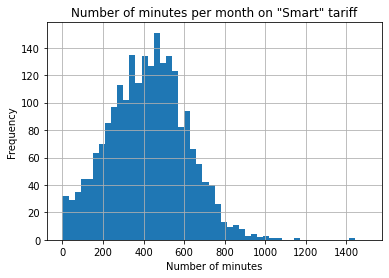

In [44]:
smart_minutes_plot = smart_minutes.plot(kind='hist',
range=(0, 1500),
bins=50,
linewidth=2,
grid=True,
title='Number of minutes per month on "Smart" tariff')
smart_minutes_plot.set_xlabel('Number of minutes')
smart_minutes_plot.set_ylabel('Frequency')
plt.show()

As you can see most talk for 500 minutes a month, just within the tariff. The slant to the right indicates that a small proportion of users talk more than the time set by the tariff.

Let's check our conclusion and see the probability that users talk an average of 500 minutes per month.

In [45]:
# we set a normal distribution with expectation 500 and standard deviation 189
distr_smart_minutes = st.norm(500, 189)
print(distr_smart_minutes.cdf(500))

0.5


The probability is 50%.

Now let's look at the probability of using the most popular minute interval from 400 to 550.

In [46]:
distr_smart_minutes_gap = st.norm(500, 189) 

x1 = 400
x2 = 550

smart_minutes_gap = distr_smart_minutes_gap.cdf(x2) - distr_smart_minutes_gap.cdf(x1)
print(smart_minutes_gap)

0.30595417358630983


Probability of 30%.

### 3.1.2. "Ultra" tariff

Let's calculate the mean, standard deviation and variance.

In [47]:
ultra_minutes = merged_users.query('tariff == "ultra"')['sum_minutes']
print('Average -', ultra_minutes.mean())
variance_ultra_minutes = np.var(ultra_minutes)
print('Dispersion -',variance_ultra_minutes)
standard_deviation_ultra_minutes = np.std(ultra_minutes)
print('Standard deviation -',standard_deviation_ultra_minutes)
ultra_minutes.describe()

Average - 545.4511041009464
Dispersion - 94104.36117385984
Standard deviation - 306.76434143143143


count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: sum_minutes, dtype: float64

Let's build a diagram of the use of minutes on the tariff "Ultra".

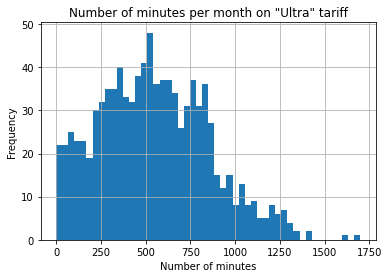

In [48]:
ultra_minutes_plot = ultra_minutes.plot(kind='hist',
range=(0, 1700),
bins=50,
linewidth=2,
grid=True,
title='Number of minutes per month on "Ultra" tariff')
ultra_minutes_plot.set_xlabel('Number of minutes')
ultra_minutes_plot.set_ylabel('Frequency')
plt.show()

As you can see on the tariff ultra users also usually spend 500 minutes per month on calls. Let's check this conclusion and see what the probability is of conversations between 450 and 750 minutes.

In [49]:
distr_ultra_minutes_gap = st.norm(500, 306) 

x1 = 450
x2 = 750

ultra_minutes_gap = distr_ultra_minutes_gap.cdf(x2) - distr_ultra_minutes_gap.cdf(x1)
print(ultra_minutes_gap)

0.3579316523893246


Probability of 35%.

## 3.2. The number of messages that users send.

### 3.2.1 'Smart' tariff

Let's do the same steps as with the minute analysis.

In [50]:
smart_sms = merged_users.query('tariff == "smart"')['cnt_messages']
print('Average -', smart_sms.mean())
variance_smart_sms = np.var(smart_sms)
print('Dispersion -',variance_smart_sms)
standard_deviation_smart_sms = np.std(smart_sms)
print('Standard deviation -',standard_deviation_smart_sms)
smart_sms.describe()

Average - 33.396311291048136
Dispersion - 798.2365495963054
Standard deviation - 28.253080355888727


count    2223.000000
mean       33.396311
std        28.259437
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: cnt_messages, dtype: float64

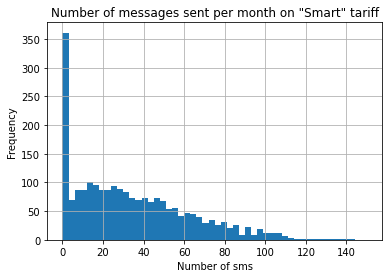

In [52]:
smart_sms_plot = smart_sms.plot(kind='hist',
range=(0, 150),
bins=50,
linewidth=2,
grid=True,
title='Number of messages sent per month on "Smart" tariff')
smart_sms_plot.set_xlabel('Number of sms')
smart_sms_plot.set_ylabel('Frequency')
plt.show()

As you can see, quite a large proportion of people who do not use sms. Nevertheless, it is noticeable that the majority of users are satisfied with 20 messages per month.

Let's look at the probability of using the most popular interval of messages from 10 to 30.

In [53]:
distr_smart_sms_gap = st.norm(20, 28) 

x1 = 10
x2 = 30

smart_sms_gap = distr_smart_sms_gap.cdf(x2) - distr_smart_sms_gap.cdf(x1)
print(smart_sms_gap)

0.27901513809832923


The probability is almost 30%.

### 3.2.2. 'Ultra' tariff

In [54]:
ultra_sms = merged_users.query('tariff == "ultra"')['cnt_messages']
print('Average -', ultra_sms.mean())
variance_ultra_sms = np.var(ultra_sms)
print('Dispersion -',variance_ultra_sms)
standard_deviation_ultra_sms = np.std(ultra_sms)
print('Standard deviation -',standard_deviation_ultra_sms)
ultra_sms.describe()

Average - 49.03364879074658
Dispersion - 2196.4215806926354
Standard deviation - 46.865995995952495


count    951.000000
mean      49.033649
std       46.890656
min        0.000000
25%        5.000000
50%       39.000000
75%       79.000000
max      224.000000
Name: cnt_messages, dtype: float64

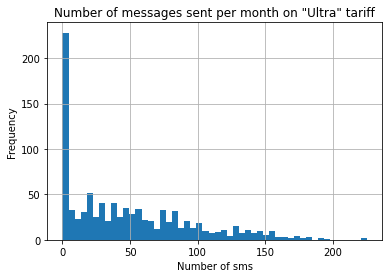

In [55]:
ultra_sms_plot = ultra_sms.plot(kind='hist',
range=(0, 225),
bins=50,
linewidth=2,
grid=True,
title='Number of messages sent per month on "Ultra" tariff')
ultra_sms_plot.set_xlabel('Number of sms')
ultra_sms_plot.set_ylabel('Frequency')
plt.show()

As can be seen, most users of the tariff ultra also do not often use sms. However, those who do, send them more often, but on average the same 20 per month. Let's look at the distribution from 10 to 30.

In [56]:
distr_ultra_sms_gap = st.norm(20, 46) 

x1 = 10
x2 = 30

ultra_sms_gap = distr_ultra_sms_gap.cdf(x2) - distr_ultra_sms_gap.cdf(x1)
print(ultra_sms_gap)

0.17209659270353722


The probability is 17%. This confirms that ultra tariff users are more likely to text than smart.

## 3.3. The amount of Internet traffic that users use.

### 3.3.1 Smart tariff

In [57]:
smart_inet = merged_users.query('tariff == "smart"')['sum_internet']
print('Average -', smart_inet.mean())
variance_smart_inet = np.var(smart_inet)
print('Dispersion -',variance_smart_inet)
standard_deviation_smart_inet = np.std(smart_inet)
print('Standard deviation -',standard_deviation_smart_inet)
smart_inet.describe()

Average - 16.330634278002698
Dispersion - 33.049025553606846
Standard deviation - 5.748828189605847


count    2223.000000
mean       16.330634
std         5.750122
min         1.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: sum_internet, dtype: float64

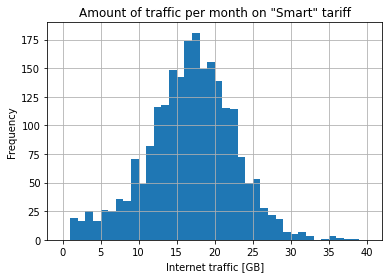

In [58]:
smart_inet_plot = smart_inet.plot(kind='hist',
range=(0, 40),
bins=40,
linewidth=2,
grid=True,
title='Amount of traffic per month on "Smart" tariff')
smart_inet_plot.set_xlabel('Internet traffic [GB]')
smart_inet_plot.set_ylabel('Frequency')
plt.show()

As you can see in the graph, on average users need 17GB of Internet on the tariff smart. Let's check our guess on probability.

In [59]:
distr_smart_inet_gap = st.norm(17, 5) 

x1 = 15
x2 = 20

smart_inet_gap = distr_smart_inet_gap.cdf(x2) - distr_smart_inet_gap.cdf(x1)
print(smart_inet_gap)

0.38116862386025063


The largest number of users on the smart tariff use between 15 and 20 GB of Internet, about 40%.

### 3.3.2. Ultra tariff

In [60]:
ultra_inet = merged_users.query('tariff == "ultra"')['sum_internet']
print('Average -', ultra_inet.mean())
variance_ultra_inet = np.var(ultra_inet)
print('Dispersion -',variance_ultra_inet)
standard_deviation_ultra_inet = np.std(ultra_inet)
print('Standard deviation -',standard_deviation_ultra_inet)
ultra_inet.describe()

Average - 19.499474237644584
Dispersion - 97.27839089076636
Standard deviation - 9.862980831917213


count    951.000000
mean      19.499474
std        9.868171
min        1.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: sum_internet, dtype: float64

As you can see, Ultra tariff users on average use 2 GB more Internet per month.

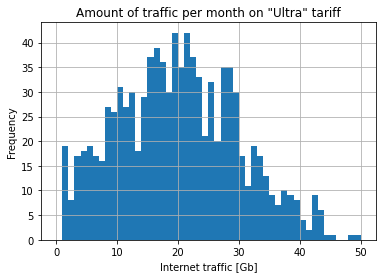

In [61]:
ultra_inet_plot = ultra_inet.plot(kind='hist',
range=(0, 50),
bins=50,
linewidth=2,
grid=True,
title='Amount of traffic per month on "Ultra" tariff')
ultra_inet_plot.set_xlabel('Internet traffic [Gb]')
ultra_inet_plot.set_ylabel('Frequency')
plt.show()

The graph shows that on average users need 20GB of Internet. Let's check our guess on probability.

In [62]:
distr_ultra_inet_gap = st.norm(19, 9) 

x1 = 17
x2 = 22

ultra_inet_gap = distr_ultra_inet_gap.cdf(x2) - distr_ultra_inet_gap.cdf(x1)
print(ultra_inet_gap)

0.21848821194729373


About 20% of all ultra tariff users use the Internet within the range of 17 to 22 GB per month.

# 4. Hypothesis testing

## 4.1. Hypothesis №1. The average revenue of Ultra and Smart tariff users are different

To begin, let's make a cross-section of the table, where we display information about rates and revenues.

In [63]:
tariff_costs = merged_users[['tariff','total_costs']]
tariff_costs.head(10)

,tariff,total_costs
0,ultra,1950
1,ultra,1950
2,ultra,1950
3,ultra,1950
4,ultra,1950
5,ultra,1950
6,ultra,1950
7,ultra,1950
8,smart,1150
9,smart,550


Let's formulate the null and alternative hypotheses:
* ***The null hypothesis is that the average revenue of Ultra and Smart tariff users are equal.***
* ***Alternative hypothesis - the average revenue of Ultra tariff users is greater than the revenue of Smart tariff.***

** Statistical significance level alpha=0.05**

Let's find the average revenue from 'Smart' tariff users.

In [64]:
smart_tariff = tariff_costs.query('tariff == "smart"')
smart_tariff_costs =  smart_tariff['total_costs']
smart_tariff_mean = smart_tariff['total_costs'].mean()
display(smart_tariff_costs.head(5))
display(smart_tariff_mean)

8     1150
9      550
10     550
11    1150
12    1550
Name: total_costs, dtype: int64

1290.8911381016644

Let's find the average revenue from 'Ultra' tariff users.

In [65]:
ultra_tariff = tariff_costs.query('tariff == "ultra"')
ultra_tariff_costs = ultra_tariff['total_costs']
ultra_tariff_mean = ultra_tariff['total_costs'].mean()
display(ultra_tariff_costs.head(5))
display(ultra_tariff_mean)

0    1950
1    1950
2    1950
3    1950
4    1950
Name: total_costs, dtype: int64

2070.9779179810726

Let us test the null hypothesis of equality of the means of the two general populations.

In [66]:
alpha = .05 # critical level of statistical significance, if p-value is less than it - reject the hypothesis

results1 = st.ttest_ind(
    smart_tariff_costs, 
    ultra_tariff_costs)

print('p-value:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 2.1830308249112924e-155
Rejecting the null hypothesis


As can be seen, the average values were not equal. The P-value is negligible.

Let's test the alternative hypothesis that the revenue for the 'Ultra' tariff is greater than for 'Smart'.

In [67]:
alpha = .05

results2 = st.ttest_1samp(
    ultra_tariff_costs,
    ultra_tariff_mean)

# the test is one-way: the p-value will be half as much
print('p-value:', results2.pvalue / 2)

# the test is one-sided to the right:
# reject the hypothesis only when the sample mean is significantly larger than the expected value

if (results2.pvalue /2 < alpha) and (smart_tariff_mean < ultra_tariff_mean):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 0.5
Failed to reject the null hypothesis


As expected, the average revenue from 'Ultra' tariff users is higher than that of 'Smart'.

### Hypothesis №1 confirmed!

## 4.2. Hypothesis №2. The average revenue of users from Moscow differs from the revenue of users from other regions.

First, we create two datasets, filtering them by city.

Dataset with revenues from users from Moscow.

In [68]:
moscow = merged_users[['city','total_costs']].query('city == "Москва"')
moscow_costs = moscow['total_costs']
display(moscow.head(5))
print('Average revenue -', moscow_costs.mean())

,city,total_costs
8,Москва,1150
9,Москва,550
17,Москва,1950
18,Москва,1950
19,Москва,1950


Average revenue - 1546.0524590163934


Dataset with proceeds from users from other cities.

In [69]:
other_cities = merged_users[['city','total_costs']].query('city != "Москва"')
other_cities_costs = other_cities['total_costs']
display(other_cities.tail(5))
print('Average revenue -', other_cities_costs.mean())

,city,total_costs
3169,Владикавказ,1750
3170,Пермь,550
3171,Пермь,1150
3172,Пермь,1513
3173,Пермь,598


Average revenue - 1519.5237909516381


Let's formulate the null and alternative hypotheses:

* ***The null hypothesis is that the average revenues of users from Moscow and other regions are equal.***
* ***Alternative hypothesis - average revenue of users from Moscow is greater than revenue from other regions.***

** Statistical significance level alpha=0.05**

Let us test the null hypothesis of equality of the means of the two general populations. Since these populations are different in size, let us calculate the variance for each of them separately.

In [70]:
alpha = .05

results3 = st.ttest_ind(
    moscow_costs, 
    other_cities_costs,
    equal_var=False)

print('p-value:', results3.pvalue)

if results3.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 0.44113705815091153
Failed to reject the null hypothesis


As it turns out, the revenue is the same, regardless of the city.

#### Hypothesis №2 disproved!

# 5. Conclusion

During the study to determine the prospective tariff for the telecom company the following facts were found out:
* The most profitable tariff is considered to be Ultra, which brings in an average of 2,070 per month from each user versus 1,290 from those on the Smart tariff;
* Average revenue does not depend on the city;
* The amount of minutes and messages in both tariffs are chosen correctly, and the majority of users are within the limits. The share of those who do not have enough allocated resources makes up about 20%;
* On average each user sends 20 messages and talks 500 minutes a month at both tariffs;
* Ultra tariff users use on average 20GB of traffic, compared to 17GB for those on Smart. Thus, Smart Tariff users pay only extra 400 rubles per month for an extra 2GB of Internet traffic above the limit. It means that it is more profitable to have a Smart plan for RUB 550 per month with an extra Gb of Internet traffic than to have an Ultra plan for 1,950 per month. Therefore it is possible to suggest that the price of an extra GB of Internet traffic on the Smart tariff should be increased so that it would be more profitable for the subscriber to purchase a more expensive Ultra tariff.
* The amount of Internet traffic in both tariffs is not enough for 45% of users. Probably we should revise the tariff plans and increase the limits.